### Tutorial for PHYS-F-420 Part 1
designed and written by Andrea Parenti, Katarina Simkova, Ioana Maris

Simulate the passage of articles through matter. 

First part: what happens to a muons passing trough a water volume?
   - Which is the energy loss as a function of the path traversed?
   - Include the energy deposit fluctuations generating based on a Landau distribution for ionisation
   - Consider 2 muons one with an energy of 1 GeV and one with an energy of 100 GeV and look at the relative energy loss  


In [1]:
import numpy as np  
from astropy import units as u

# Define relevant physical constants   
m0 = 105.6583745 * u.MeV# MeV, muon mass
me = 0.510998950 * u.MeV # MeV, electron mass 

# # Define WCD cylinder tank dimensions  
h = 120 * u.cm #cm 
r = 180 * u.cm #cm 

# Choose kinetic energy of the muon 
ek = 1000.* u.MeV # 1000 MeV = 1 GeV 

# Compute beta and gamma for the particle 

p =  np.sqrt(ek*ek + 2*ek*m0)
def _beta(ek):
    return np.sqrt(ek*ek + 2*ek*m0) / (ek+m0) 
def _gamma(ek): 
    return 1 / np.sqrt( 1 - _beta(ek)*_beta(ek) ) 

In [2]:
print('***** Starting values for the muon *****')
print('p = ',p) 
print('beta = ',_beta(ek))
print('gamma = ',_gamma(ek)) 
print('beta * gamma =  ', _beta(ek)*_gamma(ek),'\n')

beta = _beta(ek)
gamma = _gamma(ek)


***** Starting values for the muon *****
p =  1100.5983595299422 MeV
beta =  0.9954235276584903
gamma =  10.464465119137257
beta * gamma =   10.416574783950832 



For 0.1 < beta*gamma < 1000, the mean energy loss rate of a heavy charged particle in a medium is described by the Bethe equation 
Start preparing the "ingredients" for the Bethe equation

First, Compute maximum energy transfer to an electron of target material in a single collision

In [3]:
def _Wmax(_ek):
    tmp_beta = _beta(_ek)
    tmp_gamma = _gamma(_ek)
    return 2*me*(tmp_beta*tmp_gamma)**2 / (1 + 2*tmp_gamma*me / m0 + (me / m0)**2  )

Wmax = _Wmax(ek)

print('***** Maximum energy transfer to an electron for starting muon: ***** ')
print('Wmax = ',Wmax.to(u.GeV) ) 


***** Maximum energy transfer to an electron for starting muon: ***** 
Wmax =  0.10069707532222076 GeV


In [4]:
# Look up material properties (water)
# https://pdg.lbl.gov/2024/AtomicNuclearProperties/HTML/water_liquid.html  

Z_A=0.55509 *u.mol / u.g #mol g^-1, atomic number Z over atomic mass mol g^-1 
rho=1 * u.g / u.cm**3 #g cm^-3, density of liquid water 
I=7.97e-5 * u.MeV #MeV, mean excitation energy

K=0.307075 * u.MeV * u.cm **2 / u.mol #MeV mol^−1 cm2

# Define the Bethe formula as a funcion taking beta, gamma as arguments. Dimension of dE/dx is MeV/cm 

def de_dx(_ek):
    tmp_beta = _beta(_ek)
    tmp_gamma = _gamma(_ek) 
    return K*Z_A*(1/tmp_beta**2) * (0.5 *np.log(2*me* tmp_beta**2 *tmp_gamma**2 * _Wmax(_ek) / I**2) - tmp_beta**2 ) * rho  

# Define the Bethe formula as a funcion, with the muon kinetic energy as argument. Dimension of dE/dx is MeV/cm 

def de_dx(_beta,_gamma, _Wmax):
    return K*Z_A*(1/_beta**2) * (0.5 *np.log(2*me* _beta**2 *_gamma**2 * _Wmax / I**2) - _beta**2 ) * rho  

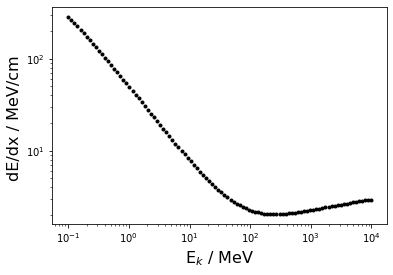

In [5]:
import matplotlib.pyplot as plt

# Check correct implementation of the Bethe formula 
ek_values = np.logspace(-1,4,100)
ek_values = ek_values * u.MeV 

beta_values = _beta(ek_values)
gamma_values = _gamma(ek_values) 
Wmax_values = _Wmax(ek_values)

plot =  plt.scatter(ek_values, de_dx(beta_values, gamma_values, Wmax_values).value, c='black', marker='.')
plt.ylabel('dE/dx / MeV/cm ', size=16)
plt.xlabel(r'E$_k$ / MeV ', size=16)

plt.xscale('log')
plt.yscale('log')


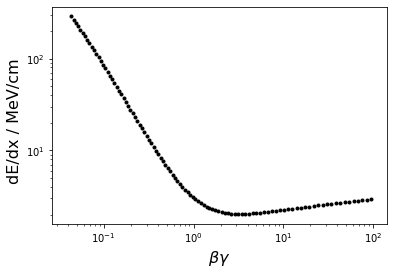

In [6]:

plot =  plt.scatter(beta_values*gamma_values, de_dx(beta_values, gamma_values, Wmax_values).value, c='black', marker='.')
plt.ylabel('dE/dx / MeV/cm  ', size=16)
plt.xlabel(r'$\beta \gamma$ ', size=16)

plt.xscale('log')
plt.yscale('log')

In [7]:
# Compute energy loss according to the Bethe formula assuming dE/dx constant across full tank 

e_loss = de_dx(beta,gamma,Wmax) * h 
print('*****  Energy loss across the tank with constant dE/dx *****')
print(e_loss)

*****  Energy loss across the tank with constant dE/dx *****
270.5621089959322 MeV
